# <b><u> Project Title : Online Retail Customer Segmentation.</u></b>

## <b> Problem Description </b>

### In this project, our task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

### <b>Benefits of customer segmentation:</b>
1. Organised customer bases.
2. Targeted communication becomes easy.
3. Choosing top sales prospects becomes easy.
  
  and many more...

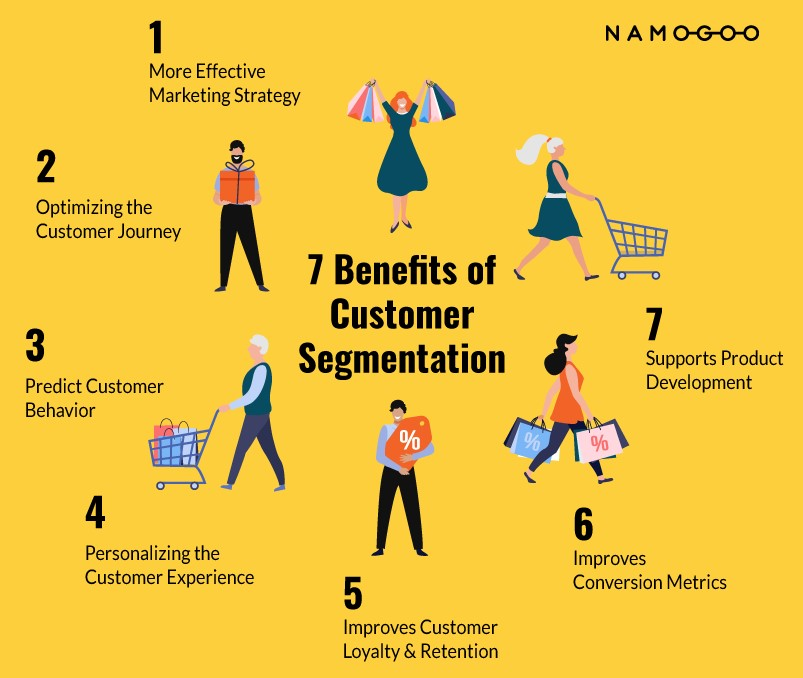

### 

## <b>Project Flowchart:</b>
1. Initial preparations.
2. Data Cleaning.
3. Feature Engineering.
4. EDA.
5. Forming the segmentation criteria.
6. Pre processing the data.
7. Model Implementation.
8. Conclusion.

# <b>1.Initial preparations:</b>

In [1]:
#Loading in the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data
df = pd.read_csv('Online Retail.csv')

## <b>2.Data Cleaning:</b>

### <b>Data Exploration</b>

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### <b>Handling null values:</b>



In [8]:
df.isnull().sum()
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There isn't any meaningfull way to impute values in the Description and CustomerID column, therefore I will just delete them.

In [9]:
#Dropping the null values in the dataset
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<b>As we can see, all the null values have been deleted.</b>

### <b>Handling duplicate values:</b>

In [11]:
df.duplicated().sum()

5225

In [12]:
#Deleting the duplicate values from the data
df.drop_duplicates(keep="first",inplace=True)

In [13]:
#Checking if the duplicate deletion has worked 
df.duplicated().sum()

0

<b>As we can see, all the duplicates have been removed.</b>

### <b>Checking for the Outliers:</b>

In [14]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

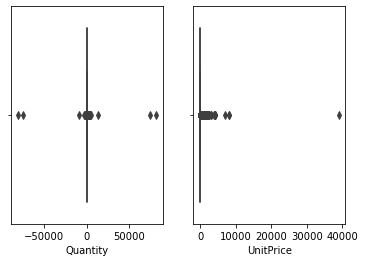

In [15]:
#Checking for outliers in the data
columns= ['Quantity','UnitPrice'] 
for index, feature in enumerate(columns):
  plt.subplot(1,2,index+1)
  sns.boxplot(data=df,x=feature)

As we can see there are outliers in both the columns, Therefore we'll try to remove them. Here we can also see that, Quantity has negative values, which is practically impossible, these values represent cancelled orders and we'll deal with them later.

In [16]:
#Removing columns using the IQR method
def remove_outliers(data:pd.DataFrame,feature):
  """A function that removes outliers using the IQR method"""
  
  #Calculating the upper and lower fence
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)
  IQR = Q3-Q1
  upper_fence = Q3 + (1.5*IQR)
  lower_fence = Q1 - (1.5*IQR)
  
  #Deleting elements beyond the upper and lower fence
  if lower_fence<0:
    data = data[data[feature]<=upper_fence]
  else:
    data = data[(data[feature]>=lower_fence) and (data[feature]<=upper_fence)]
  return data

In [17]:
#Applying the outlier removal function on two of our possible columns
df = remove_outliers(df,'Quantity')
df = remove_outliers(df,'UnitPrice')

In [18]:
df.shape

(340447, 8)

### <b>Removing cancelled orders:</b>

In our data, we have cancelled orders which are represented by a capital C before the Invoice number. eg: C536379. we need to remove them from the dataset

In [19]:
#Converting each value to string for comparison
df['InvoiceNo']=df['InvoiceNo'].apply(str)

In [20]:
#To calculate the number of cancelled orders present
def cancelled_order(row):
  order=0  
  if 'C' in row:
    order+=1
    return order
  else:
    return 0 

In [21]:
#Calculating number of cancelled orders before removal
df['InvoiceNo'].apply(lambda x: cancelled_order(x)).sum()

7182

**There are 7182 cancelled orders**

In [22]:
# all the cancelled orders
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,09-12-2011 09:27,2.08,16446.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,09-12-2011 09:57,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


**we can delete the cancelled orders**

In [23]:
#Deleting the cancelled orders.
df =df[df['Quantity']>0]

In [24]:
#Checking if the deletion has worked
sum=df['InvoiceNo'].apply(lambda x: cancelled_order(x)).sum()
sum

0

In [25]:
#Converting the InvoiceNo column back to int type
df['InvoiceNo']=df['InvoiceNo'].astype("int64")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333265 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    333265 non-null  int64  
 1   StockCode    333265 non-null  object 
 2   Description  333265 non-null  object 
 3   Quantity     333265 non-null  int64  
 4   InvoiceDate  333265 non-null  object 
 5   UnitPrice    333265 non-null  float64
 6   CustomerID   333265 non-null  float64
 7   Country      333265 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 22.9+ MB


## <b>3.Feature Engineering:</b>

### <b>Extracting columns from the InvoiceDate column:</b>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333265 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    333265 non-null  int64  
 1   StockCode    333265 non-null  object 
 2   Description  333265 non-null  object 
 3   Quantity     333265 non-null  int64  
 4   InvoiceDate  333265 non-null  object 
 5   UnitPrice    333265 non-null  float64
 6   CustomerID   333265 non-null  float64
 7   Country      333265 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 22.9+ MB


In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%d-%m-%Y %H:%M")

In [29]:
#Using the InvoiceDate column to extract different columns
df['Hour'] = df['InvoiceDate'].dt.hour
df['DayOfM'] =df['InvoiceDate'].dt.day
df['DayOfW'] = df['InvoiceDate'].dt.strftime('%A')
df['Month'] =df['InvoiceDate'].dt.month
df['Year'] =df['InvoiceDate'].dt.year
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [30]:
#A look of the dataframe after creating new columns
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,DayOfM,DayOfW,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,8,1,Wednesday,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,8,1,Wednesday,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333265 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    333265 non-null  int64  
 1   StockCode    333265 non-null  object 
 2   Description  333265 non-null  object 
 3   Quantity     333265 non-null  int64  
 4   InvoiceDate  333265 non-null  object 
 5   UnitPrice    333265 non-null  float64
 6   CustomerID   333265 non-null  float64
 7   Country      333265 non-null  object 
 8   Hour         333265 non-null  int64  
 9   DayOfM       333265 non-null  int64  
 10  DayOfW       333265 non-null  object 
 11  Month        333265 non-null  int64  
 12  Year         333265 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 35.6+ MB


### <b>Forming the Total Amount column:</b>

Formual: <b>Total amount = Unit price * Quantity</b>

In [32]:
#Creating the total amount column
df['total_amount']=df['Quantity']*df['UnitPrice']

In [33]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,DayOfM,DayOfW,Month,Year,total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,8,1,Wednesday,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,8,1,Wednesday,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,8,1,Wednesday,12,2010,20.34


## <b>4.EDA:</b>

In [34]:
def create_visualisation(data:pd.DataFrame,x:str,y:str,title:str,x_label:str,y_label:str,display_value:bool=True,rotation:bool=True):
  """A function that creates a barplot visualisation for the given data"""
  plt.figure(figsize=(12,12))
  ax = sns.barplot(data=data,x=x,y=y)
  if display_value==True:
    for a in ax.patches:                                                        #To write values on top of each bar
        ax.annotate(format(a.get_height(), '.1f'),                 
                       (a.get_x() + a.get_width() / 2., a.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
  if rotation == True:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')             #Rotating the xticks to make them clear to read
  plt.title(title,size=30)
  plt.xlabel(x_label,size=30)
  plt.ylabel(y_label,size=30)
  plt.show()

### <b>Most frequently ordered products:</b>

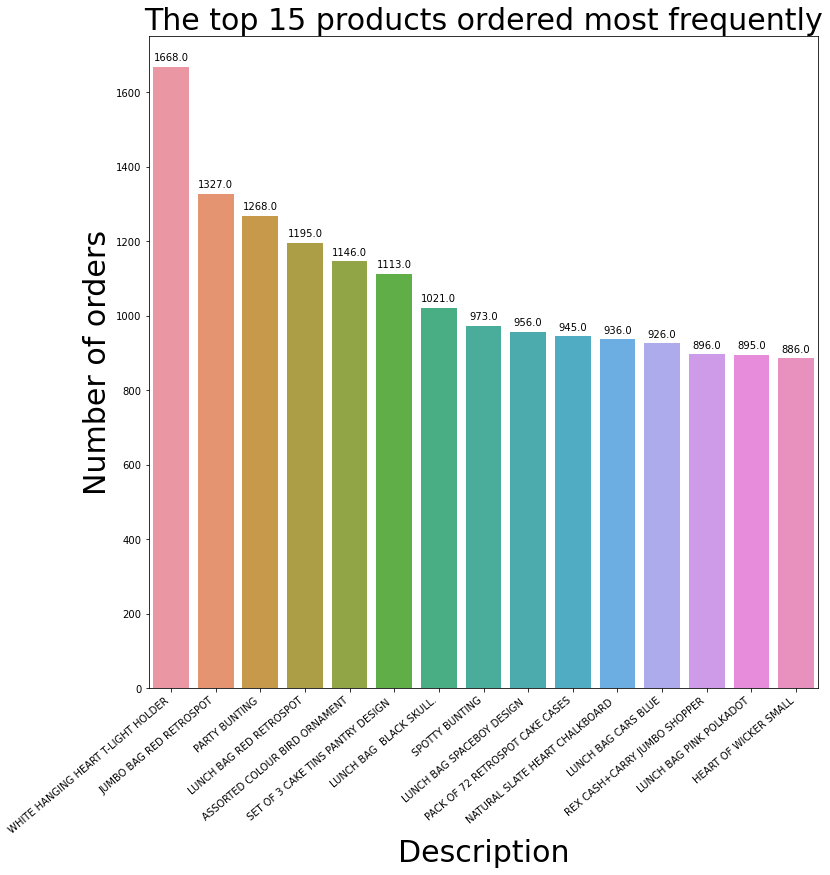

In [35]:
#Getting the top 15 most frequently ordered products
top_15_pro_freq=df['Description'].value_counts().reset_index().rename(columns={'index':'Description','Description':'Count'})[0:15]

#Calling the visualisation function
create_visualisation(data=top_15_pro_freq,x='Description',y='Count',
                     title='The top 15 products ordered most frequently',
                     x_label='Description',y_label='Number of orders')

**The product 'White hanging heart t-light holder' is the most frequently ordered product, around 1700 times. 'Jumbo bag red retrospot' is the second most ordered product, around 1300 times.**

### <b>Products with the most quantity ordered:</b>

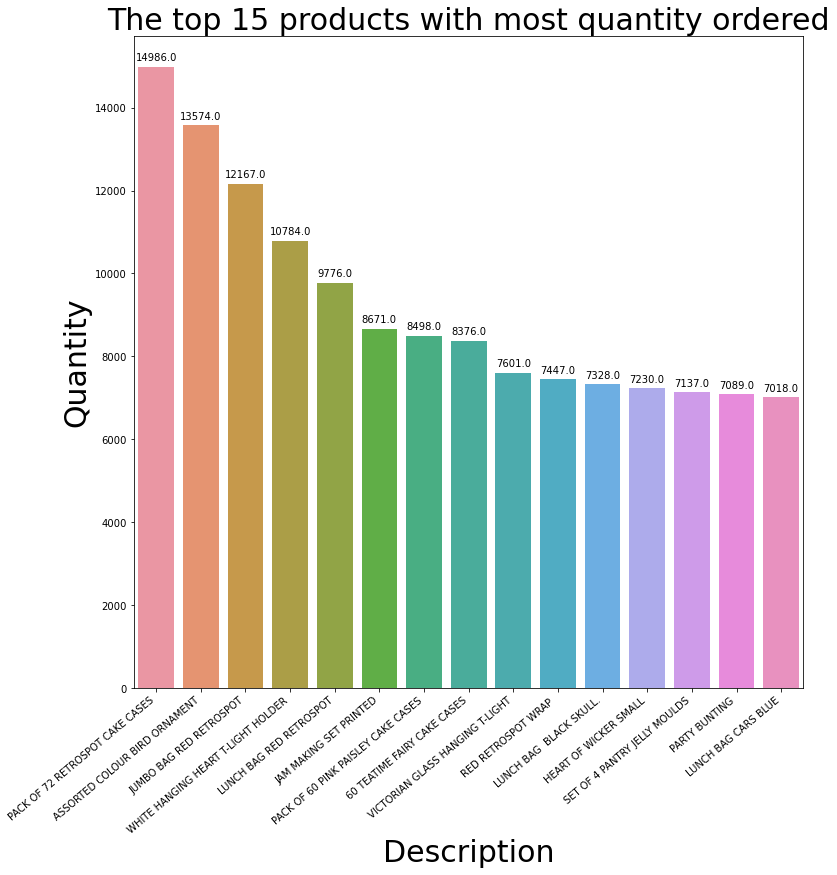

In [36]:
#Getting the top 15 products ordered with the most quantity
top_15_pro_quant=df.groupby('Description')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=False)[0:15]

#Calling the visualisation function
create_visualisation(data=top_15_pro_quant,x='Description',y='Quantity',
                     title='The top 15 products with most quantity ordered',
                     x_label='Description',y_label='Quantity')

**The product 'Pack of 72 retrospot cake cases' has the most quantity ordered, around 15,000 units. 'Assorted colour bird ornament' is second with around 13,000 units ordered.**

### <b>Products that make the most money:</b>

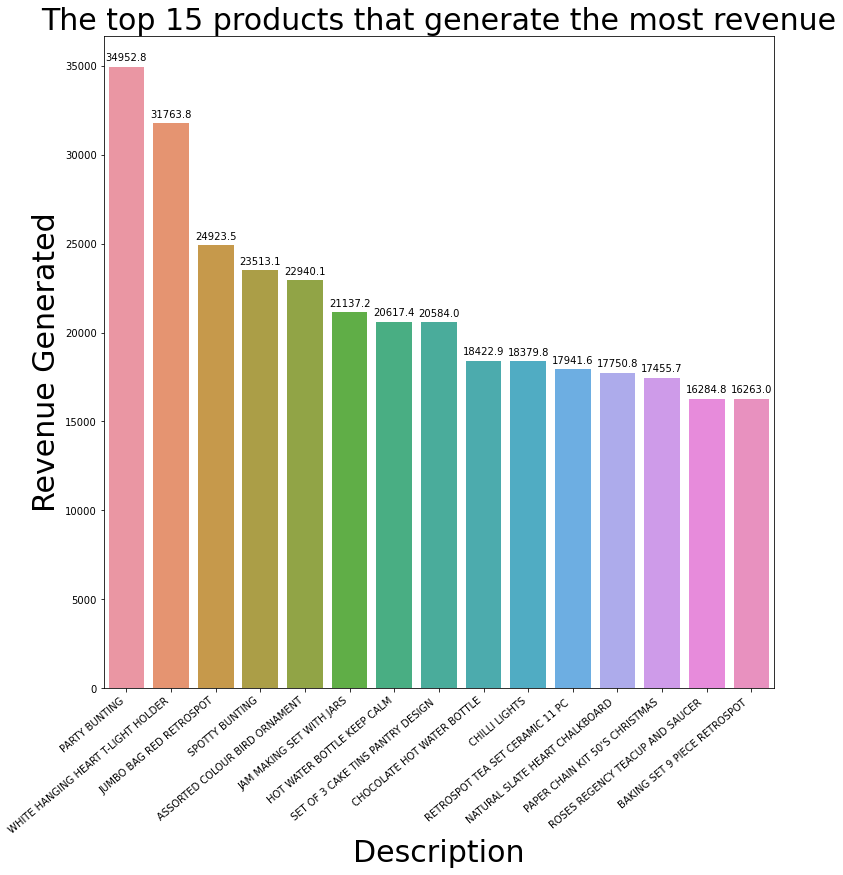

In [37]:
#Getting the top 15 products that generate the most amount of money
top_15_pro_money =df.groupby('Description')['total_amount'].sum().reset_index().sort_values(by='total_amount',ascending=False)[0:15]

#Calling the visualisation function
create_visualisation(data=top_15_pro_money,x='Description',y='total_amount',
                     title='The top 15 products that generate the most revenue',
                     x_label='Description',y_label='Revenue Generated')

**The product "Product Bunting" has made the most money, around 35,000 sterling. "White Hanging heart T-light holder" being the second, which has made around 32,000 sterling.**

### <b>Customers who have placed the most orders:</b>

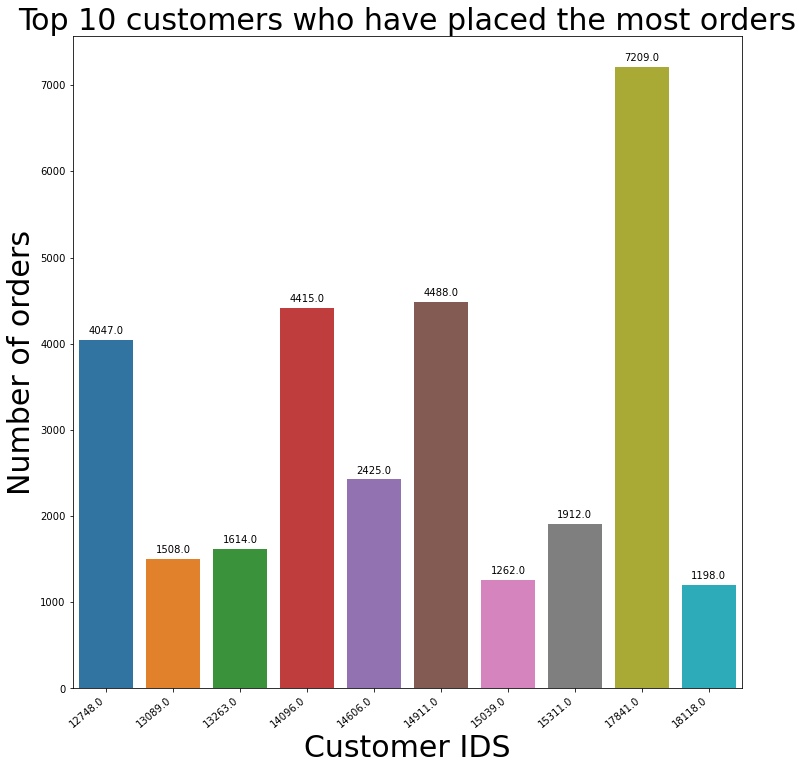

In [38]:
#Getting the top 15 products that generate the most amount of money
top_order_cust=df['CustomerID'].value_counts().reset_index().sort_values(by='CustomerID',ascending=False)[0:10]

#Calling the visualisation function
create_visualisation(data=top_order_cust,x='index',y='CustomerID',
                     title='Top 10 customers who have placed the most orders',
                     x_label='Customer IDS',y_label='Number of orders')

**The customer with the ID: 17841 has the highest number of orders and the customer with the ID: 18118 has the lowest number of orders.**

### <b>Countries from which most orders have been made:</b>

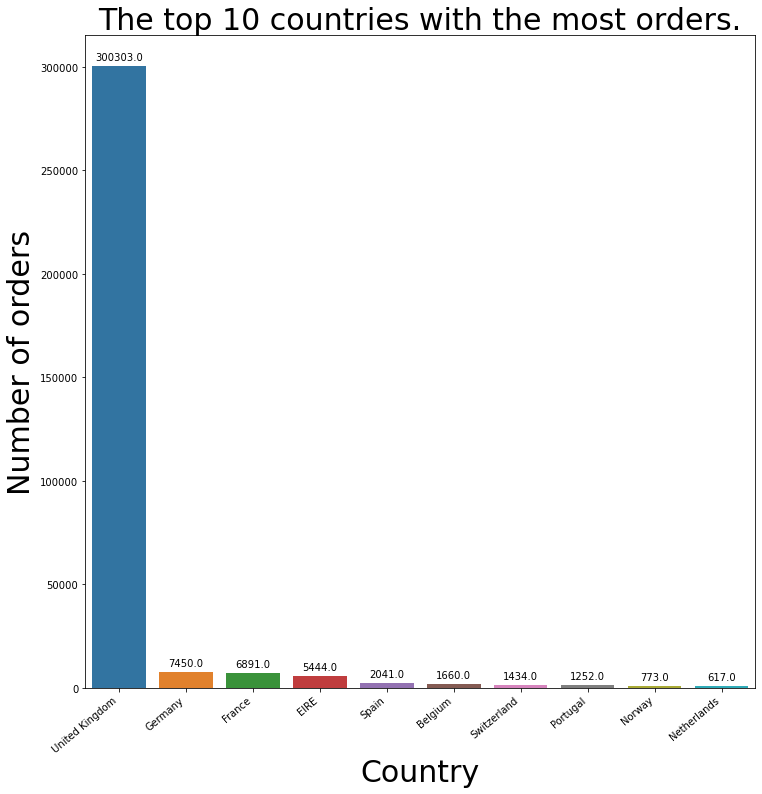

In [39]:
#Getting the countries with the most orders
top_countries_df=df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Count'})[0:10]

#Calling the visualisation function
create_visualisation(data=top_countries_df,x='Country',y='Count',
                     title='The top 10 countries with the most orders.',
                     x_label='Country',y_label='Number of orders')

**As we can see, United Kingdom has the most orders placed, with around 3 lakh orders. Germany being second, but way less than United Kingdom.**

### <b>Hours for which most orders are made:</b>

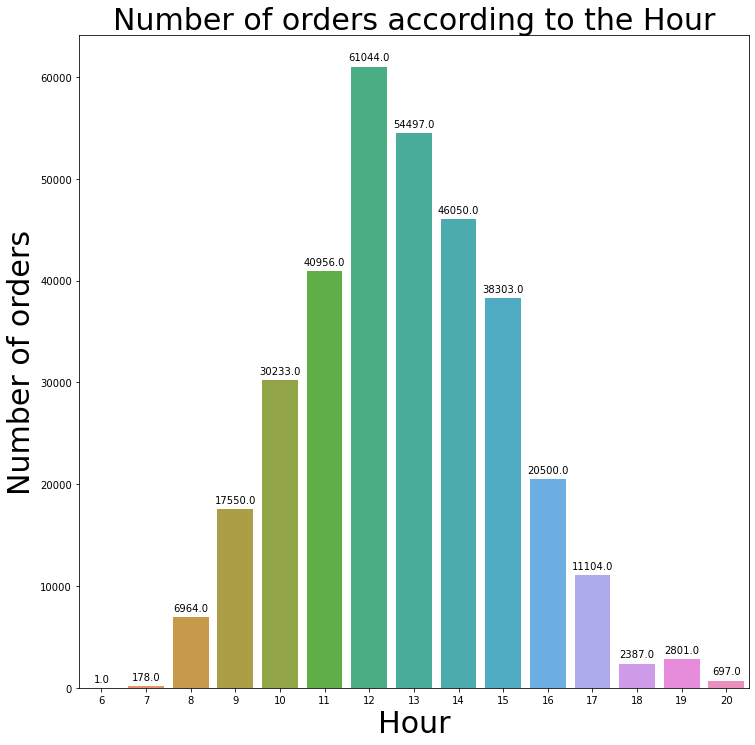

In [40]:
#Getting the number of orders for each hour
hour_df=df['Hour'].value_counts().reset_index().sort_values(by='index')

#Calling the visualisation function
create_visualisation(data=hour_df,x='index',y='Hour',
                     title='Number of orders according to the Hour',
                     x_label='Hour',y_label='Number of orders',rotation=False)

**Most orders are made in the 12th hour, i.e 12pm to 1pm, and the least orders are made in the 6th hour, i.e 6am to 7am. We can see that no orders are made between 8pm and 6am.**

### <b>Day of the month on which most orders are made:</b>

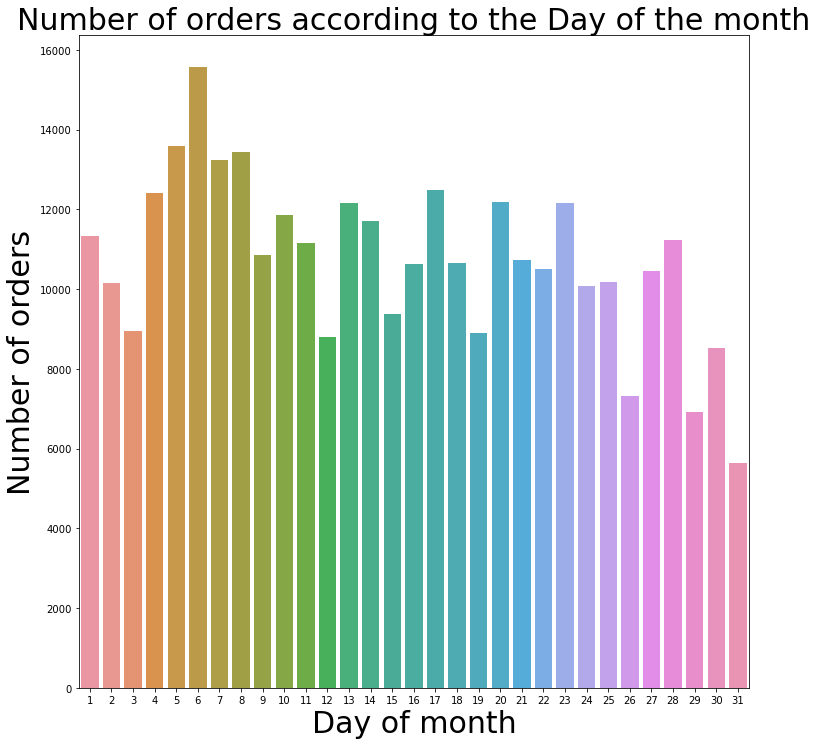

In [41]:
#Getting the number of orders as per the day of the month
day_of_month_df=df['DayOfM'].value_counts().reset_index().sort_values(by='index')

#Calling the visualisation function
create_visualisation(data=day_of_month_df,x='index',y='DayOfM',
                     title='Number of orders according to the Day of the month',
                     x_label='Day of month',y_label='Number of orders',display_value=False,rotation=False)

**The 6th day of the month has the highest number of orders and the 31st day has the lowest.**

### <b>Day of the week on which most orders are made:</b>

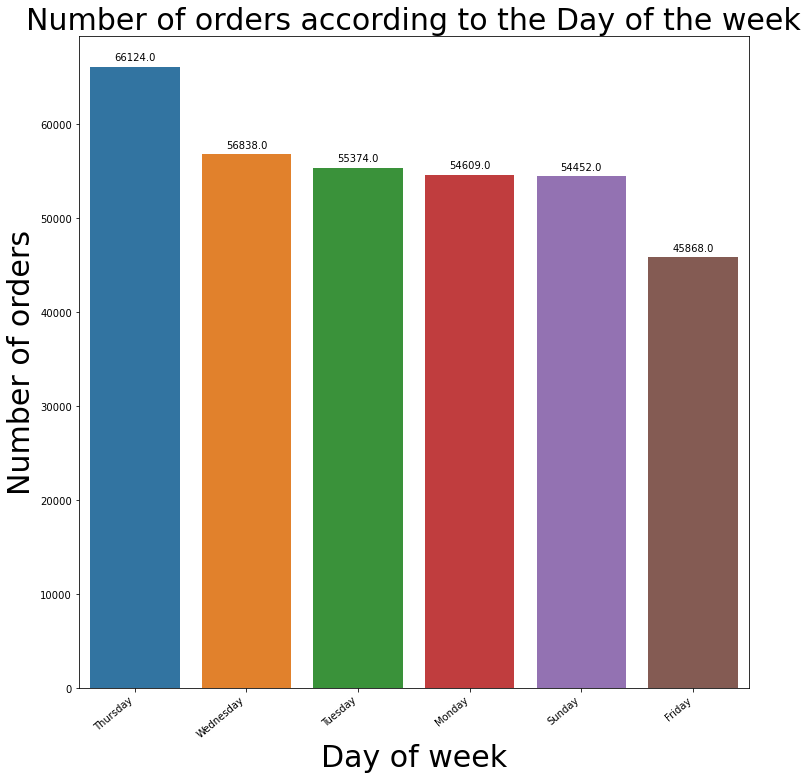

In [42]:
#Getting the number of orders as per the day of the week
day_of_week_df=df['DayOfW'].value_counts().reset_index()

#Calling the visualisation function
create_visualisation(data=day_of_week_df,x='index',y='DayOfW',
                     title='Number of orders according to the Day of the week',
                     x_label='Day of week',y_label='Number of orders')

**Most of the orders are made on Thurday,around 66 thousand, and the least number of orders are made on Friday, around 46 thousand.**

### <b>Most orders made according to the month:</b>

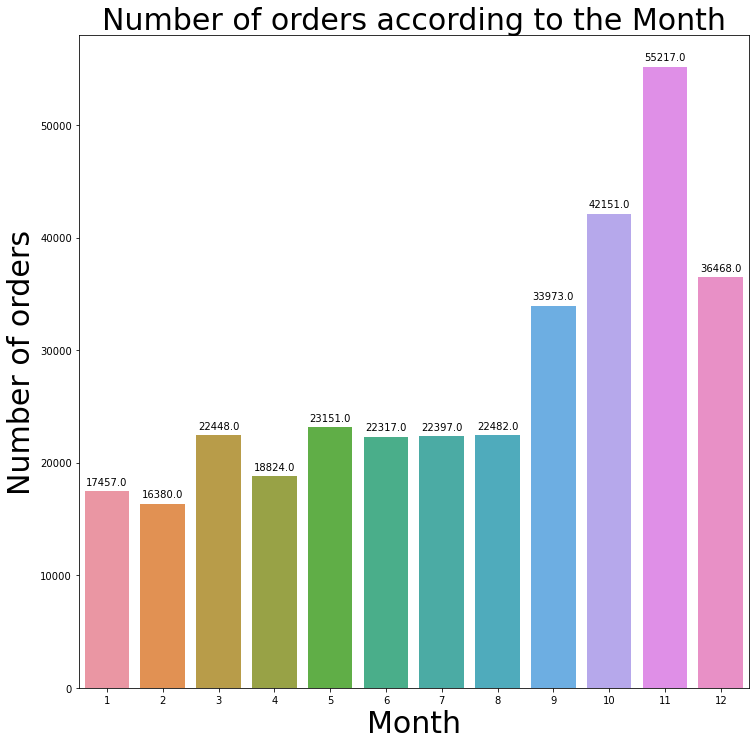

In [43]:
#Getting the number of orders as per the month
month_df=df['Month'].value_counts().reset_index().sort_values(by='index')

#Calling the visualisation function
create_visualisation(data=month_df,x='index',y='Month',
                     title='Number of orders according to the Month',
                     x_label='Month',y_label='Number of orders',rotation=False)

**The most number of orders are made in the 11th month, i.e December, and the least in the 2nd month, i.e February.**

### <b>In this dataset we have only 1 month for the year 2010 and 12 months for 2011, therefore I think there is no need to perform any analysis on the year column.</b>

### <b>Distribution of the data:</b>

In [44]:
df["InvoiceNo"]=df["InvoiceNo"].astype("object")

In [45]:
#Creating a list of all the numerical columns in the data
numerical_columns=[]
for i in df.columns:
    if(df[i].dtype != "object"):
        numerical_columns.append(i)
numerical_columns


['Quantity',
 'UnitPrice',
 'CustomerID',
 'Hour',
 'DayOfM',
 'Month',
 'Year',
 'total_amount']

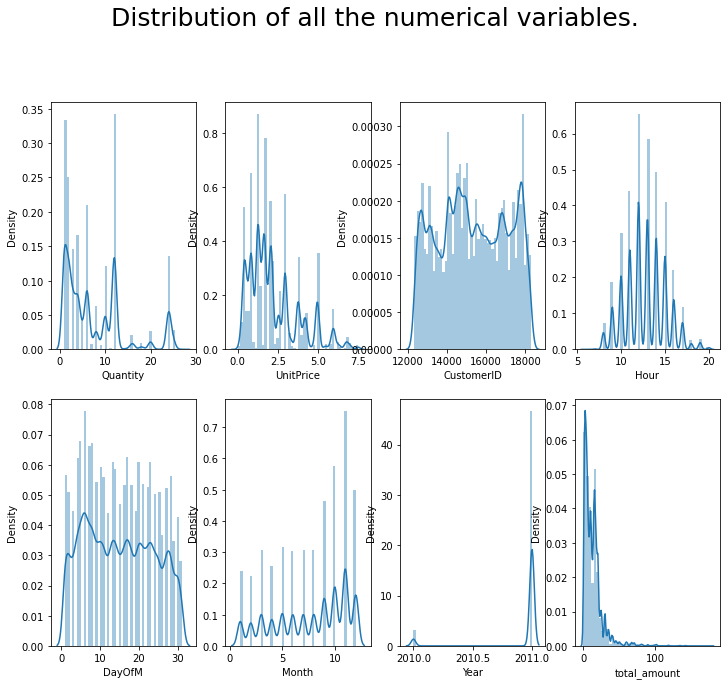

In [46]:
#Plotting the distribution of the data
plt.figure(figsize=(12,10))
plt.suptitle('Distribution of all the numerical variables.',va='bottom',size=25)
for index, item in enumerate(numerical_columns):
  plt.subplot(2,4,index+1)
  sns.distplot(df[item])
plt.show()

### <b>Plotting the correlation matrix:</b>

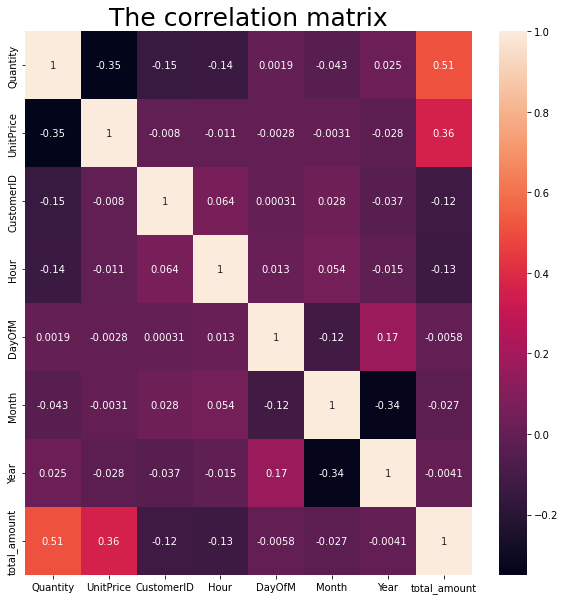

In [47]:
#Forming and plotting the correlation matrix
corr= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.title('The correlation matrix',size=25)
plt.show()

**As we can see, there is no distinct correlation between the variables except for the columns 'total_amount', 'Quantity' and 'UnitPrice'**

In [48]:
#Creating a variable to hold the latest date in the dataset
latest_date=df['InvoiceDate'].max()

In [49]:
#Creating a dataframe to contain the most recent date of order for each customer
recency_df=df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency_df.head()

,CustomerID,InvoiceDate
0,12347.0,2011-12-07
1,12348.0,2011-04-05
2,12349.0,2011-11-21
3,12350.0,2011-02-02
4,12352.0,2011-11-03


In [50]:
#creating a dataframe to contain the number of times a customer has ordered
frequency_df=df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
frequency_df.head()

,CustomerID,InvoiceNo
0,12347.0,166
1,12348.0,6
2,12349.0,58
3,12350.0,16
4,12352.0,66


In [51]:
#creating a dataframe to contain the total spends of a customer
monetory_df=df.groupby('CustomerID')['total_amount'].sum().reset_index()
monetory_df.head()

,CustomerID,total_amount
0,12347.0,3314.73
1,12348.0,90.20
2,12349.0,999.15
3,12350.0,294.40
4,12352.0,1130.94


In [52]:
#Creating a dataframe for the RFM model
rfm_df = pd.DataFrame()
rfm_df['CustomerID'] = recency_df['CustomerID']
rfm_df['Recency'] = recency_df['InvoiceDate'].apply(lambda x: (latest_date-x).days)
rfm_df['Frequency'] = frequency_df['InvoiceNo']
rfm_df['Monetary'] = monetory_df['total_amount']

In [53]:
#Setting the CustomerID as the index
rfm_df.set_index('CustomerID',inplace=True)

#First 10 observations of the RFM dataframe
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,2,166,3314.73
12348.0,248,6,90.20
12349.0,18,58,999.15
12350.0,310,16,294.40
12352.0,36,66,1130.94
12353.0,204,2,29.30
12354.0,232,40,682.69
12355.0,214,9,219.00
12356.0,245,33,1086.56


In [54]:
#Creating a list with the columns of the rfm dataframe
rfm_cols = ['Recency','Frequency','Monetary']

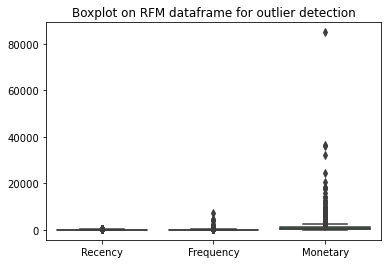

In [55]:
#Checking for outliers in the rfm dataframe
sns.boxplot(data=rfm_df[rfm_cols])
plt.title('Boxplot on RFM dataframe for outlier detection')
plt.show()

In [56]:
#shape of the dataframe before removing outliers
rfm_df.shape

(4192, 3)

In [57]:
#Removing the outliers
rfm_df = remove_outliers(data=rfm_df,feature='Recency')
rfm_df = remove_outliers(data=rfm_df,feature='Frequency')
rfm_df = remove_outliers(data=rfm_df,feature='Monetary')

In [58]:
#Shape of the dataframe after deleting the outliers
rfm_df.shape

(3426, 3)

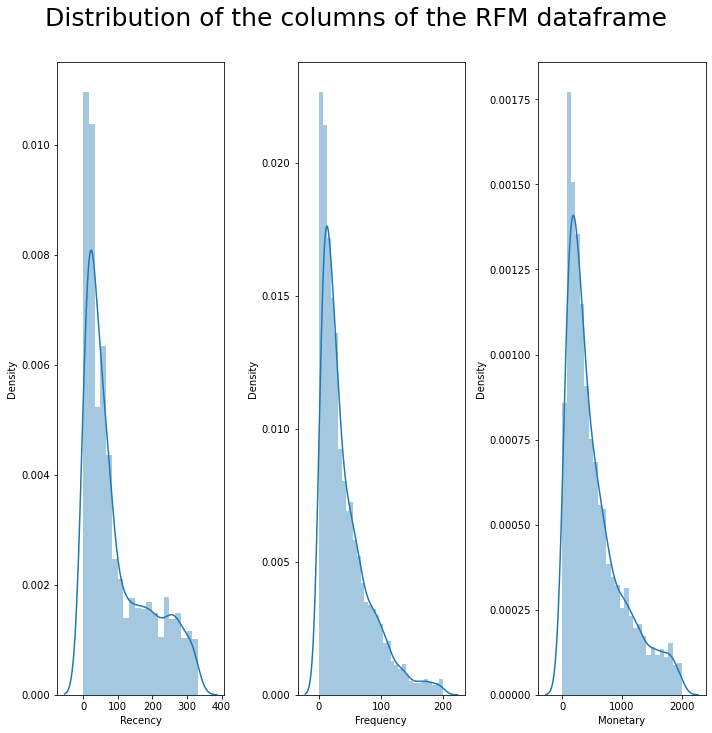

In [59]:
#Plotting the distribution of the columns of the RFM dataframe
plt.figure(figsize=(10,10))
plt.suptitle('Distribution of the columns of the RFM dataframe',va='bottom',size=25)
for index, item in enumerate(rfm_cols):
  plt.subplot(1,3,index+1)
  sns.distplot(rfm_df[item])
plt.tight_layout()

<b>Points to be noted from the distribution plots:</b>
1. Most of the customers have a Recency between 0-100 days.
2. Most of the customers have a frequency between 0-120 times.
3. Most of the customers have a Monetary between 0- 1000 sterlings.

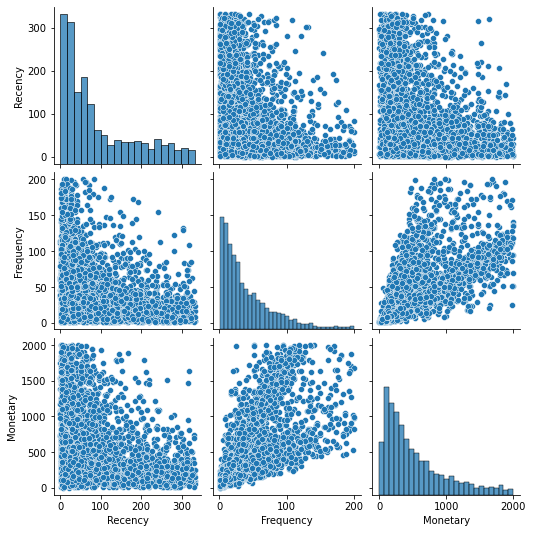

In [60]:
#plotting the pairplot to see the relation bewteen the columns of the RFM dataframe
sns.pairplot(rfm_df)
plt.show()

<b>Points to be noted from the pairplot:</b>

1. Most of the values are linked to lower recency values.
2. There are very few values linked to a large recency value and large monetary/frequency value.
3. The Frequency and Monetory column show a pretty linear relationship with each other.

## <b>Pre processing the data:</b>

<b>Feature Scaling</b> is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

In [61]:
#Scaling and normalising the data
scaler = StandardScaler()
normaliser = Normalizer()
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled = normaliser.fit_transform(rfm_scaled)

In [62]:
#A look of the scaled data
rfm_scaled

array([[ 0.78542253, -0.42650403, -0.44855965],
       [-0.61021127,  0.30869424,  0.72962324],
       [ 0.94244751, -0.26203598, -0.20767723],
       ...,
       [ 0.55325419, -0.55415866, -0.62194693],
       [-0.60638177, -0.54646777, -0.57764532],
       [-0.51977354,  0.19706303,  0.83126508]])

## <b>Model implementation: </b>
In this project we are dealing with an unlabelled dataset and a clustering problem, therefore we'll be using some unsupervised algorithms.
Two models I have used:
1. K means with elbow method.
2. Hierarchical clustering (Agglomerative).

In [63]:
def eval_metrics(data:pd.DataFrame,labels: np.array):
    sh_score = silhouette_score(data,labels)
    print('The silhouette score is:',sh_score)

### <b>K-Means with elbow method:</b>

<b>Elbow method:</b> In cluster analysis, the elbow method is used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

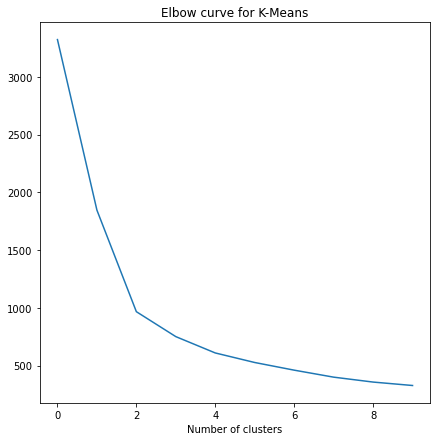

In [64]:
#Getting the elbow curve for different number of clusters
wcss = []
#Implementing the model for different number of clusters
for num_clusters in range(1,11):
    kmeans_model = KMeans(n_clusters=num_clusters,max_iter=1000,random_state=0)
    kmeans_model.fit_predict(rfm_scaled)
    
    wcss.append(kmeans_model.inertia_)
    
# plot the elbow curve 
plt.figure(figsize=(7,7))
plt.plot(wcss)
plt.title('Elbow curve for K-Means')
plt.xlabel('Number of clusters')
plt.show()

As we can see, the Elbow point is 3 and therefore we will apply a KMeans model with 3 clusters on our data.

In [65]:
#Implementing KMeans with 3 clusters
kmeans_model= KMeans(n_clusters=3,max_iter=1000,random_state=0)
kmeans_model.fit(rfm_scaled)

KMeans(max_iter=1000, n_clusters=3, random_state=0)

In [67]:
cluster_predict=kmeans_model.labels_
rfm_kmeans=rfm_df.copy()

In [68]:
rfm_kmeans['cluster_id']=kmeans_model.labels_
rfm_kmeans.head()

,Recency,Frequency,Monetary,cluster_id
CustomerID,,,,
12348.0,248,6,90.20,1
12349.0,18,58,999.15,2
12350.0,310,16,294.40,1
12352.0,36,66,1130.94,2
12353.0,204,2,29.30,1


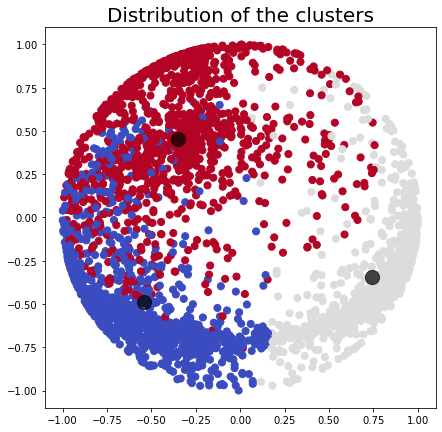

In [69]:
#Visualising the kmeans clustering
plt.figure(figsize=(7,7))
plt.scatter(x=rfm_scaled[:,0],y=rfm_scaled[:,1],c=cluster_predict,s=50,cmap='coolwarm')

#Plotting the cluster centres 
centers = kmeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)

plt.title("Distribution of the clusters",size=20)
plt.show()

In [70]:
#Calculating the evaluation metrics for the K-means model with 3 clusters
eval_metrics(rfm_scaled,cluster_predict)

The silhouette score is: 0.5233813538947185


#### <b>Cluster profiling for KMeans with 3 clusters.</b>

In [72]:
#Assigning the labels to the dataframe
rfm_kmeans.head()
rfm_kmeans['cluster_id'].value_counts()

0    1233
2    1185
1    1008
Name: cluster_id, dtype: int64

In [73]:
def visualise_dist(data:pd.DataFrame,y:str,x:str='cluster_id'):
  """A function that produces a boxplot visualisation
     which shows the distribution of the data over
     different clusters in the data"""
  sns.boxplot(data=data,x=x,y=y)
  plt.title(f'{y} value distribution among different labels')
  plt.show()

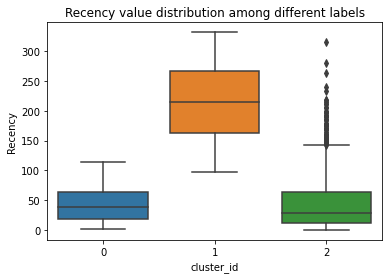

In [74]:
#Visualising the values of recency for different Labels
visualise_dist(rfm_kmeans,y='Recency')

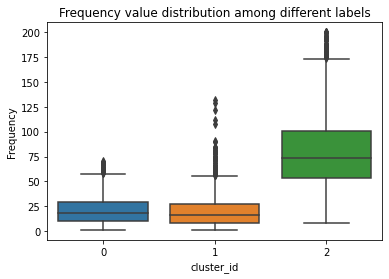

In [75]:
#Visualising the values of frequency for different Labels
visualise_dist(rfm_kmeans,y='Frequency')

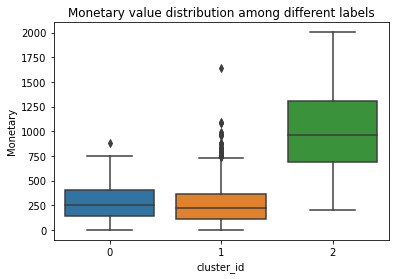

In [76]:
#Visualising the values of Monetary for different Labels
visualise_dist(rfm_kmeans,y='Monetary')

<b>Profiling:</b>
1. Cluster 0 - These are the customers who have low monetary contribution, low frequency and low recency value. (Medium-importance cluster)
2. Cluster 1 - These are the customers who have low monetary contribution, low frequency and high recency value. (Low-importance cluster) (Worst cluster)
3. Cluster 2 - These are the customers who have high monetary contribution, high frequency value and low recency value. (High-importance cluster) (Best Cluster)


### <b>Hierarchical clustering:</b>

Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

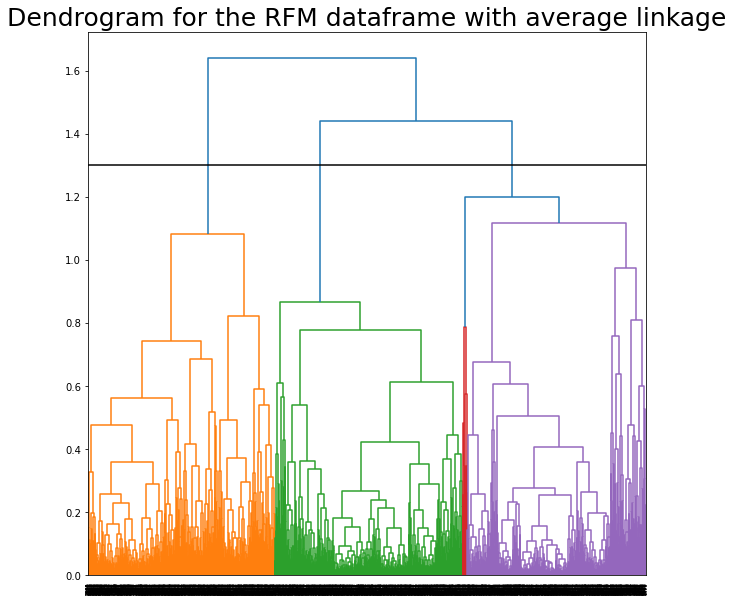

In [77]:
#Getting the number of clusters using dendogram
plt.figure(figsize=(10,10))
merging = linkage(rfm_scaled,method='average',metric='euclidean')
dendrogram(merging)
plt.title('Dendrogram for the RFM dataframe with average linkage',size=25)

#Cutting the dendrogram at the longest vertical line without being cut by a horizontal line 
plt.axhline(y=1.3,c='k')
plt.show()

<b>We get the optimum number of clusters as 3 from the dendrogram.</b>

Hierarchical clustering has 2 types:
1. Agglomerative clustering.
2. Divisive Clustering.

I used Agglomerative approach.

In [78]:
#Applying the Agglomerative clustering model on the RFM dataset
agglo_model = AgglomerativeClustering(n_clusters=3,linkage='average',affinity='euclidean')
cluster_predict_agglo = agglo_model.fit_predict(rfm_scaled)

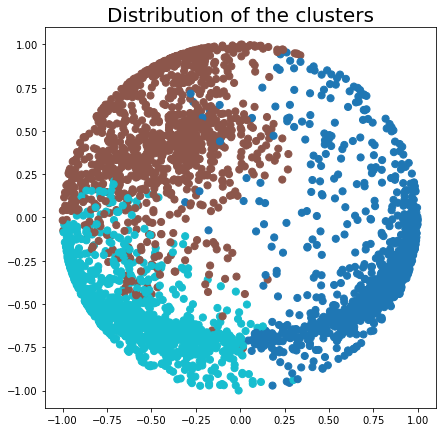

In [79]:
#Visualising the agglomerative clustering
plt.figure(figsize=(7,7))
plt.scatter(x=rfm_scaled[:,0],y=rfm_scaled[:,1],c=cluster_predict_agglo,s=50,cmap='tab10')

plt.title("Distribution of the clusters",size=20)
plt.show()

In [80]:
#Calculating the evaluation metrics for the Agglomerative model
eval_metrics(rfm_scaled,cluster_predict_agglo)

The silhouette score is: 0.49581156711609203


#### <b>Cluster profiling for agglomerative approach with 3 clusters:</b>

In [81]:
rfm_agglo =rfm_df.copy()

In [93]:
#Assigning the labels to all the cusotmers
rfm_agglo['cluster_id']=cluster_predict_agglo
rfm_agglo.head()

,Recency,Frequency,Monetary,cluster_id_agglo,cluster_id
CustomerID,,,,,
12348.0,248,6,90.20,0,0
12349.0,18,58,999.15,1,1
12350.0,310,16,294.40,0,0
12352.0,36,66,1130.94,1,1
12353.0,204,2,29.30,0,0


In [94]:
#Checking the value counts for different lables
rfm_agglo['cluster_id'].value_counts()

2    1152
1    1150
0    1124
Name: cluster_id, dtype: int64

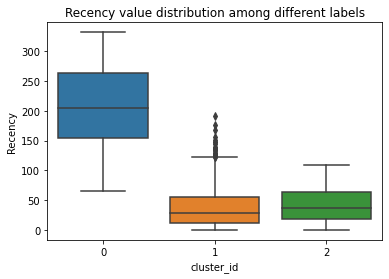

In [95]:
#Visualising the values of recency for different Labels
visualise_dist(rfm_agglo,y='Recency')

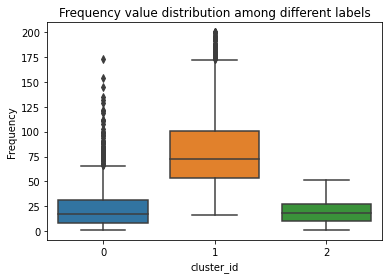

In [96]:
#Visualising the values of Frequency for different Labels
visualise_dist(rfm_agglo,y='Frequency')

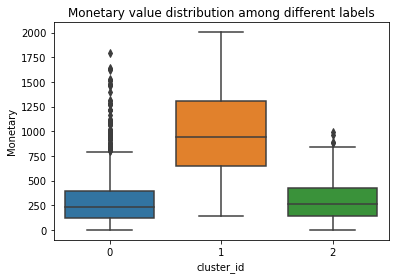

In [97]:
#Visualising the values of Monetary for different Labels
visualise_dist(rfm_agglo,y='Monetary')

<b>Profiling:</b>
1. Cluster 0 - This is the cluster with high recency value, low frequency value and a low monetary contribution. (Low-importance cluster) (Worst cluster)
2. Cluster 1 - This is the cluster with low recency value, high frequency and a high monetary contribution. (High importance cluster) (Best Cluster)
3. Cluster 2 - This is the cluster with low recency value, low frequency and a low monetary contribution. (Medium-importance cluster)

## <b>Conclusion:</b>


<b>EDA insights:</b>

1. The product 'White hanging heart t-light holder' is the most frequently ordered product, around 1700 times. 'Jumbo bag red retrospot' is the second most ordered product, around 1300 times.
2. The product 'Pack of 72 retrospot cake cases' has the most quantity ordered, around 15,000 units. 'Assorted colour bird ornament' is second with around 13,000 units ordered.
3. The product "Product Bunting" has made the most money, around 35,000 sterling. "White Hanging heart T-light holder" being the second, which has made around 32,000 sterling.
4. The customer with the ID: 17841 has the highest number of orders and the customer with the ID: 18118 has the lowest number of orders.
5. United Kingdom has the most orders placed, with around 3 lakh orders. Germany being second, but way less than United Kingdom.
6. Most orders are made in the 12th hour, i.e 12pm to 1pm, and the least orders are made in the 6th hour, i.e 6am to 7am.
7. The 6th day of the month has the highest number of orders and the 31st day has the lowest.
8. Most of the orders are made on Thurday,around 66 thousand, and the least number of orders are made on Friday, around 46 thousand.
9. The most number of orders are made in the 11th month, i.e December, and the least in the 2nd month, i.e February.

<b>Model implementation conclusion:</b>

In [98]:
#Using pretty table to give model conclusions
from prettytable import PrettyTable

#Creating the Table
my_table = PrettyTable(['Model name','Tuning Method','Number of Clusters','Silhouette score'])

#Adding rows that contain info about the models implemented.
my_table.add_row(['K means with elbow method','elbow method','3','0.5233813'])
my_table.add_row(['Hierarchical clustering','Dendrogram','3','0.4958115'])

print('Conclusion from model implementation:\n')
print(my_table)
print('\n K means with elbow method is the best model and simple K means is the worst performing model')

Conclusion from model implementation:

+---------------------------+---------------+--------------------+------------------+
|         Model name        | Tuning Method | Number of Clusters | Silhouette score |
+---------------------------+---------------+--------------------+------------------+
| K means with elbow method |  elbow method |         3          |    0.5233813     |
|  Hierarchical clustering  |   Dendrogram  |         3          |    0.4958115     |
+---------------------------+---------------+--------------------+------------------+

 K means with elbow method is the best model and simple K means is the worst performing model


Actions to take for each cluster:
1. Perform targeted analysis and targeted advertisement for each cluster.
2. Advertise products that can be presented with a discount to the customers in the lesser important clusters, which could convert the customers in these less important groups to customers of more important clusters.